# Tarea 2 - Alexandre Poupeau

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
# defining some hyperparameters
percent_train = 0.75

# figure size
plt.rcParams['figure.figsize'] = (6, 4) # 16,9 para el notebook / 6,4 para el informe

# import data to handle it easily after
data = np.genfromtxt(fname="https://raw.githubusercontent.com/GAMES-UChile/Curso-Aprendizaje-de-Maquinas/master/datos/datosT2.txt")
length_data = data.shape[0]

## Exercice 1 - No Lineal Regression

### 1) Import data

We are going to take a look at data from a airline company. The dataset represents the number of passengers at a function of time. We are going to divide the dataset into two parts : the first years to train the model and the rest to evaluate or test the model.

In [3]:
# dividing the dataset into two parts train and test
idx_train_test_sep = int(length_data*percent_train)

X_train = data[:idx_train_test_sep, 0]
Y_train = data[:idx_train_test_sep, 1]

X_test = data[idx_train_test_sep:, 0]
Y_test = data[idx_train_test_sep:, 1]

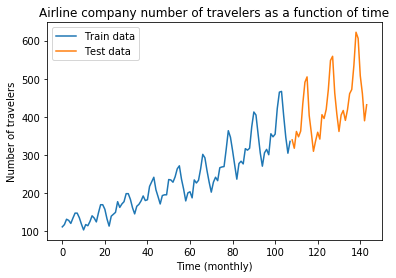

In [4]:
# plot data train/test
plt.plot(X_train, Y_train, label="Train data")
plt.plot(X_test, Y_test, label="Test data")
plt.title("Airline company number of travelers as a function of time")
plt.xlabel("Time (monthly)")
plt.ylabel("Number of travelers")
plt.legend()
plt.show()

What we can see is that there is a fluctuation each year due to, I suppose, the different seasons (especially winter and summer). Overall, the number of passengers increases with time (we can suppose the company gets more and more well-known and approved by people) and the fluctuation also increases with time. 

### 2) Polynomial model

We are going to try to find a model to fit the data using a polynomial base. Here is how we construct the model :

$y=f_{\theta}(x) + \eta = \Phi_d(x)\theta + \eta$ where $\Phi_d(x) = [1, x, x^2, ..., x^d]$ and $d$ is the degree of the polynome.

We suppose that $\eta$ describes noise and therefore can be represented as following a Gaussian distribution centered in zero : $\eta \sim \mathcal{N}(0, \sigma^2_{\eta})$.

Thus, we need to find the optimal $\theta^{\prime} = [\theta, \sigma^2_{\eta}]$.

#### 2.1) Using Mean Square Regularized (MCR)

In [5]:
def polyBaseMatrix(X, degree):
    """
        Compute the polynomial base matrix \Phi(X) given the input 
        X = [x_1, ..., x_n].
        
        Arguments:
            X (array) : input data
            degree (int) : degree of the polynomial base
            
        Returns:
            phi_d_X (array) : matrix of shape (len(X), degree+1)  
    """
    length = len(X)
    phi_d_X = np.ones(shape=length)
    for d in range(1, degree+1):
        phi_d_X = np.vstack((phi_d_X, X**d))
    return phi_d_X.T

In [6]:
def optimizerPolyMCR(X, Y, degree, rho=1):
    """
        Compute the optimal parameters for a polynomial model.
        Warning : assert(len(X)==len(Y)) and degree >= 0.
        
        Arguments:
            X (array) : input data used to fit the model
            Y (array) : ouput data used to fit the model 
            degree (int) : defines the degree of the polynomial model
        
        Returns:
            opt_params (array) : the optimal parameters for the 
                polynomial model
    """
    phi_d_X = polyBaseMatrix(X, degree)
    mat_to_inv = np.matmul(phi_d_X.T, phi_d_X) + rho*np.identity(degree+1)
    inverse_part = np.linalg.inv(mat_to_inv)
    opt_params = np.matmul(np.matmul(inverse_part, phi_d_X.T), Y)
    return opt_params

1215.5151983245296 4562.779026648855
0.0 10.0


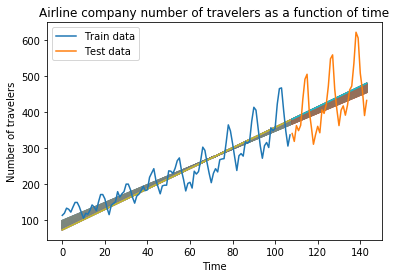

1110.243958572215 4532.862187918533
0.0 4.646464646464646


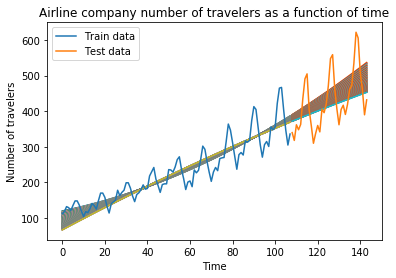

1108.97110657808 6626.679868644522
0.0 0.0


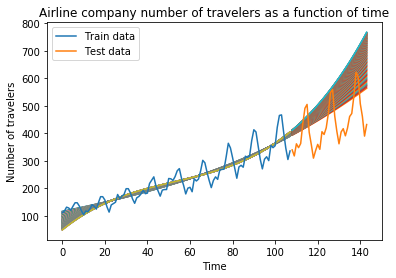

1108.3808294173639 4777.342808140891
0.0 0.20202020202020202


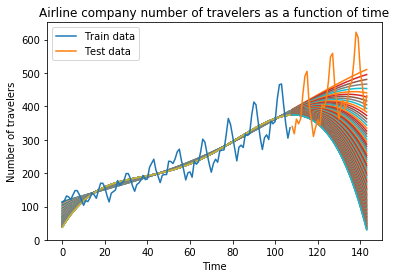

In [7]:
degree_values = np.linspace(1, 4, 4)
rho_values = np.linspace(0, 10, 100) # best grado 2, rho= 4.61 

for d in degree_values:
    test_MSEs = list()
    train_MSEs = list()
    for rho in rho_values:
        opt_params = optimizerPolyMCR(X=X_train, Y=Y_train, degree=int(d), rho=rho)

        phi_d_X_train =  polyBaseMatrix(X=X_train, degree=int(d))
        phi_d_X_test = polyBaseMatrix(X=X_test, degree=int(d))

        Y_pred_train = np.matmul(opt_params, phi_d_X_train.T)
        Y_pred_test = np.matmul(opt_params, phi_d_X_test.T)
        
        train_MSE = np.mean((Y_train - Y_pred_train)**2)
        test_MSE = np.mean((Y_test - Y_pred_test)**2)
        train_MSEs.append(train_MSE)
        test_MSEs.append(test_MSE)
        
        # display predictions
        plt.plot(X_train, Y_pred_train)
        plt.plot(X_test, Y_pred_test)
    
    best_test_MSE = np.min(test_MSEs)
    best_rho_test = rho_values[np.argmin(test_MSEs)]
    best_train_MSE = np.min(train_MSEs)
    best_rho_train = rho_values[np.argmin(train_MSEs)]
    print(best_train_MSE, best_test_MSE)
    print(best_rho_train, best_rho_test)

    # display real values
    plt.plot(X_train, Y_train, label="Train data")
    plt.plot(X_test, Y_test, label="Test data")
    plt.title("Airline company number of travelers as a function of time")
    plt.xlabel("Time")
    plt.ylabel("Number of travelers")
    plt.legend()
    plt.show()

Now we are taking the best value for $\theta$ and the best $\rho$ and visualizing the predictions on a graph.

[8.74873700e+01 2.43339158e+00 2.47509173e-03]


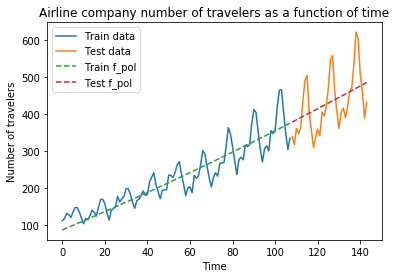

In [8]:
# producing the best f_pol
degree_value = 2
rho_value = 4.61 # best grado 2, rho= 4.61 

opt_params = optimizerPolyMCR(X=X_train, Y=Y_train, degree=degree_value, rho=rho_value)
print(opt_params)

phi_d_X_train =  polyBaseMatrix(X=X_train, degree=degree_value)
phi_d_X_test = polyBaseMatrix(X=X_test, degree=degree_value)

Y_pred_train = np.matmul(opt_params, phi_d_X_train.T)
Y_pred_test = np.matmul(opt_params, phi_d_X_test.T)

# Defining f_pol
f_pol = np.concatenate((Y_pred_train, Y_pred_test))

# display real values
plt.plot(X_train, Y_train, label="Train data")
plt.plot(X_test, Y_test, label="Test data")
plt.plot(X_train, Y_pred_train, label="Train f_pol", linestyle="--")
plt.plot(X_test, Y_pred_test, label="Test f_pol", linestyle="--")
plt.title("Airline company number of travelers as a function of time")
plt.xlabel("Time")
plt.ylabel("Number of travelers")
plt.legend()
plt.show()

#### Using Maximum A Posteriori (MAP)

We want to maximize $p(\theta^{\prime}|data) \equiv p(data|\theta^{\prime})p(\theta^{\prime}) = \dfrac{1}{\sqrt{2\pi \sigma_{\eta}^2}^N} \exp{(\dfrac{-1}{2\sigma_{\eta}^2}\displaystyle\sum_{i=1}^N (y_i - \Phi_d(xi)\theta)^2)} * \dfrac{1}{\sqrt{2\pi \sigma_{\theta^{\prime}}^2}} \exp{(\dfrac{-1}{2\sigma_{\theta^{\prime}}^2}\|\mu_{\theta^{\prime}}-\theta^{\prime}\|^2)}$

We can suppose that all the information we have on the prior is $\theta^{\prime} \sim \mathcal{N}(\mu_{\theta^{\prime}}, \sigma_{\theta^{\prime}}^2)$ where, to simplify everything, $\mu_{\theta^{\prime}}=0$ and $\sigma_{\theta^{\prime}}^2=1$.

Thus $NLL(\theta^{\prime}) = -\log{(p(\theta^{\prime}|data))} \equiv \dfrac{N}{2}\log{(\sigma_{\eta}^2)} + \dfrac{N}{2\sigma_{\eta}^2} mean((Y - \Phi_d(X)\theta)^2) + \dfrac{1}{2}(\|\theta\|^2 + (\sigma_{\eta}^2)^2)$.

We want to find $\theta^{\prime}_{opt} = argmin(NLL(\theta^{\prime}))$.

In [9]:
def nll(theta, X, Y, degree):
    """
    
    """
    n = len(X)
    phi_d_X = polyBaseMatrix(X, degree)
    mean_part = np.mean((Y-np.matmul(phi_d_X, theta[:-1]))**2)
    nll = (n/2)*np.log(theta[-1]) + (n/(2*theta[-1]))*mean_part + (1/2)*(np.sum(theta[:-1]**2)+theta[-1]**2)
    return nll

In [10]:
tuple([None for _ in range(0, 2+1)]+[(0, 10)])

(None, None, None, (0, 10))

In [11]:
def optimizerPolyMAP(degree, maxiter=120):
    """
    
    """
    np.warnings.filterwarnings('ignore') # default / ignore

    stock = list()
    for i in range(0, maxiter):
        theta0 = np.array([np.random.randint(0, 10) for _ in range(0, degree+2)])
        #[87.4873, 2.43339, 2.5*10**(-3), np.random.randint(-10, 10)])

        result = scipy.optimize.minimize(fun=nll, 
                                         x0=theta0, 
                                         args=(X_train, Y_train, degree), 
                                         method="L-BFGS-B",
                                         bounds=tuple([(None, None) for _ in range(0, degree+1)]+[(0, 50)]))
        
        opt_params = result.x
        theta_opt = opt_params[:-1]
        sigma_eta_opt = opt_params[-1]
        
        phi_d_X_train =  polyBaseMatrix(X=X_train, degree=degree)
        phi_d_X_test = polyBaseMatrix(X=X_test, degree=degree)

        Y_pred_train = np.matmul(theta_opt, phi_d_X_train.T) \
            + np.random.normal(0, np.sqrt(np.abs(sigma_eta_opt)), len(X_train))
        Y_pred_test = np.matmul(theta_opt, phi_d_X_test.T) \
            + np.random.normal(0, np.sqrt(np.abs(sigma_eta_opt)), len(X_test))
        
        train_MSE = np.mean((Y_train - Y_pred_train)**2)
        test_MSE = np.mean((Y_test - Y_pred_test)**2)
        
        stock.append([theta0, opt_params, train_MSE, test_MSE])
    
    stock_np = np.array(stock)
    idx = np.argmin(stock_np[:, 3])

    theta0_opt = stock_np[idx, 0]
    theta_opt = stock_np[idx, 1]
    best_train_MSE = stock_np[idx, 2]
    best_test_MSE = stock_np[idx, 3]

    print("[SYNTHESIS]")
#     print("Initial theta0 that provides the best theta_opt :", theta0_opt)
    print("Best optimal theta :", theta_opt)
    print("Train loss (MSE on train data part) :", best_train_MSE)
    print("Test loss (MSE on test data part) :", best_test_MSE)
    
    return (theta0_opt, theta_opt, best_train_MSE, best_test_MSE)

REMARK : In order to add noise when constructing the solution, uncomment the two lines with "+ np.random.normal(0, np.sqrt(sigma_eta_opt), len(X_train/X_test))"

[SYNTHESIS]
Best optimal theta : [ 3.98559071e+00  7.60760072e+00 -1.09412073e-01  9.83029208e-04
 -2.95121906e-06  2.11739859e+01]
Train loss (MSE on train data part) : 2160.929204243968
Test loss (MSE on test data part) : 4627.528302559378


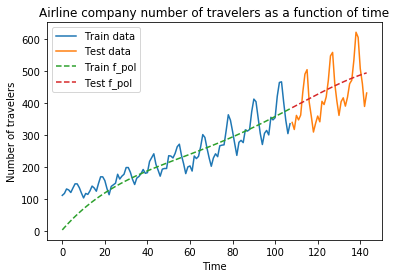

[SYNTHESIS]
Best optimal theta : [ 2.99482604e+00  5.77652789e+00 -3.96994116e-02  1.72849813e-04
  1.05218884e+01]
Train loss (MSE on train data part) : 2468.564308764629
Test loss (MSE on test data part) : 4797.791989297005


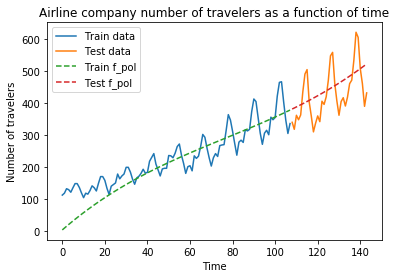

[SYNTHESIS]
Best optimal theta : [ 2.46397697e+01  4.76334169e+00 -1.55535947e-02  4.84549963e+01]
Train loss (MSE on train data part) : 2108.7291355373836
Test loss (MSE on test data part) : 7787.344265570685


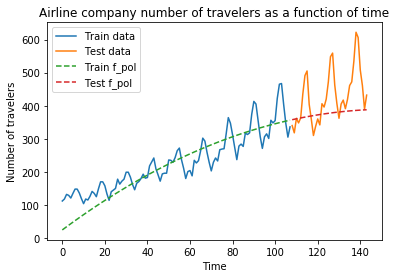

[SYNTHESIS]
Best optimal theta : [35.06990499  3.36397845 48.82761173]
Train loss (MSE on train data part) : 2312.201221243705
Test loss (MSE on test data part) : 4933.875120733504


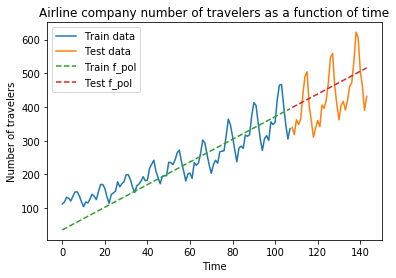

In [12]:
for d in range(4, 0, -1):
    result = optimizerPolyMAP(degree=d)
    opt_params = result[1]
    theta_opt = opt_params[:-1]
    sigma_eta_opt = opt_params[-1]
    phi_d_X_train =  polyBaseMatrix(X=X_train, degree=d)
    phi_d_X_test = polyBaseMatrix(X=X_test, degree=d)
    Y_pred_train = np.matmul(theta_opt, phi_d_X_train.T) \
#         + np.random.normal(0, np.sqrt(sigma_eta_opt), len(X_train))
    Y_pred_test = np.matmul(theta_opt, phi_d_X_test.T) \
#         + np.random.normal(0, np.sqrt(sigma_eta_opt), len(X_test))
    
    plt.plot(X_train, Y_train, label="Train data")
    plt.plot(X_test, Y_test, label="Test data")
    plt.plot(X_train, Y_pred_train, label="Train f_pol", linestyle="--")
    plt.plot(X_test, Y_pred_test, label="Test f_pol", linestyle="--")
    plt.title("Airline company number of travelers as a function of time")
    plt.xlabel("Time")
    plt.ylabel("Number of travelers")
    plt.legend()
    plt.show()

### 3) First periodic component

In this part we are going to add a periodic component to the polynomial $f_{pol}$ approximation we have.

In [13]:
def periodicComponent(theta, X):
    """
        Arguments:
            theta (array) : parameters to define the periodic component
            X (array) : input to apply the periodic component
        
        Returns:
            periodic_comp (array) : has size of X, where each value of X is tranformed into periodic component
    """
    periodic_comp = theta[0] * np.sin(theta[1]*X+theta[2])*np.exp(theta[3]*X)
    return periodic_comp

In [14]:
def minusLogLikelihood(theta, X, Y, f_base):
    """
        Arguments:
            theta (array) : parameters to optimize
            X (array) : input data
            Y (array) : output data of the corresponding input data
            f_base (array) : base to add to a periodic component (ex: f_pol for part iii)
        
        Returns:
            minus_log_likelihood (float): -log(l(theta)) where l(theta) = p(datos|theta)
    """
    periodic_comp = periodicComponent(theta, X)
    y_theta_x_i = f_base + periodic_comp
    mean_part = np.mean((Y-y_theta_x_i)**2)
    minus_log_likelihood = (1/2)*np.log(theta[4]) + (1/(2*theta[4]))*mean_part
    return minus_log_likelihood

REMARK : In order to add noise when constructing the solution, uncomment the two lines with "+ np.random.normal(0, np.sqrt(theta_opt[-1]), len(X_train/X_test))"

[SYNTHESIS]
Initial theta0 that provides the best theta_opt : [6.   9.   6.   0.01 8.  ]
Best optimal theta : [1.30504501e+01 5.18656431e-01 3.04416002e+01 1.63269016e-02
 1.43045717e+03]
Train loss (MSE on train data part) : 2604.2402807604917
Test loss (MSE on test data part) : 2361.2115984099273


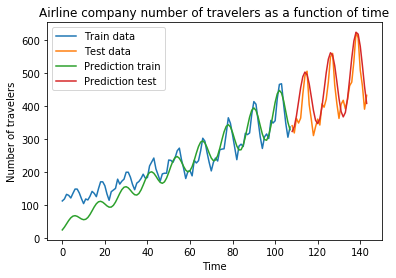

In [15]:
stock = list()
np.warnings.filterwarnings('ignore') # default / ignore

# iterate to find the best model possible
for iteration in range(0, 150):
    
    # generate a random initial theta
    theta0 = np.array([np.random.randint(-10, 10),
                       np.random.randint(-10, 10), 
                       np.random.randint(-10, 10),
                       0.01,
                       np.random.randint(0, 10)])

    # compute the optimal parameters (WITH f_base = Y_pred_train)
    result = scipy.optimize.minimize(fun=minusLogLikelihood, 
                                     x0=theta0, 
                                     args=(X_train, Y_train, Y_pred_train), 
                                     method="BFGS",
                                     bounds=tuple([(None, None) for _ in range(0, 3+1)]+[(0, 10)]))
                                      #options={'disp': True, 'maxiter': 1000})
        
    # optimal parameters found for the given theta0
    theta_opt = result.x

    # compute the predictions
    Y_pred_train2 = Y_pred_train + periodicComponent(X=X_train, theta=theta_opt) \
        + np.random.normal(0, np.sqrt(np.abs(theta_opt[-1])), len(X_train))
    Y_pred_test2 = Y_pred_test + periodicComponent(X=X_test, theta=theta_opt) \
        + np.random.normal(0, np.sqrt(np.abs(theta_opt[-1])), len(X_test))
    
    # compute MSE
    train_MSE2 = np.mean((Y_train-Y_pred_train2)**2)
    test_MSE2 = np.mean((Y_test-Y_pred_test2)**2)
    
    # append all the data in a list
    stock.append([theta0, theta_opt, train_MSE2, test_MSE2])



stock_np = np.array(stock)
idx = np.argmin(stock_np[:, 3])

theta0_opt = stock_np[idx, 0]
theta_opt = stock_np[idx, 1]
best_train_MSE2 = stock_np[idx, 2]
best_test_MSE2 = stock_np[idx, 3]

print("[SYNTHESIS]")
print("Initial theta0 that provides the best theta_opt :", theta0_opt)
print("Best optimal theta :", theta_opt)
print("Train loss (MSE on train data part) :", best_train_MSE2)
print("Test loss (MSE on test data part) :", best_test_MSE2)

Y_pred_train2 = Y_pred_train + periodicComponent(X=X_train, theta=theta_opt) \
#     + np.random.normal(0, np.sqrt(theta_opt[-1]), len(X_train))
Y_pred_test2 = Y_pred_test + periodicComponent(X=X_test, theta=theta_opt) \
#     + np.random.normal(0, np.sqrt(theta_opt[-1]), len(X_test))

# visualize how good is the best selected model
plt.plot(X_train, Y_train, label="Train data")
plt.plot(X_test, Y_test, label="Test data")
plt.plot(X_train, Y_pred_train2, label="Prediction train")
plt.plot(X_test, Y_pred_test2, label="Prediction test")
plt.title("Airline company number of travelers as a function of time")
plt.xlabel("Time")
plt.ylabel("Number of travelers")
plt.legend()
plt.show()

REMARK : In order to add noise when constructing the solution, uncomment the two lines with "+ np.random.normal(0, np.sqrt(theta_opt[-1]), len(X_train/X_test))"

[SYNTHESIS]
Initial theta0 that provides the best theta_opt : [ 5.    5.   -8.    0.01  8.  ]
Best optimal theta : [ 3.56901851e+03  1.25659781e+01 -9.42235403e+01 -1.30469878e-02
  3.50336713e+02]
Train loss (MSE on train data part) : 656.4552057229552
Test loss (MSE on test data part) : 1634.9829835957073


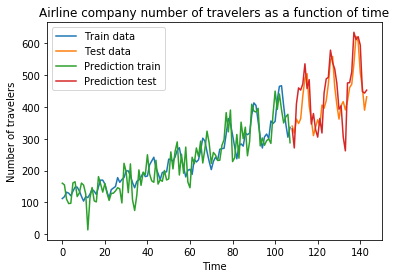

In [19]:
stock = list()
np.warnings.filterwarnings('ignore') # default / ignore

# iterate to find the best model possible
for iteration in range(0, 200):
    
    # generate a random initial theta
    theta0 = np.array([np.random.randint(-10, 10),
                       np.random.randint(-10, 10), 
                       np.random.randint(-10, 10),
                       0.01,
                       np.random.randint(1, 10)])

    # compute the optimal parameters
    result = scipy.optimize.minimize(fun=minusLogLikelihood, 
                                     x0=theta0, 
                                     args=(X_train, Y_train, Y_pred_train2), 
                                     method="BFGS",
                                     bounds=tuple([(None, None) for _ in range(0, 4)]+[(0, 10)]))
                                      #options={'disp': True, 'maxiter': 1000})
        
    # optimal parameters found for the given theta0
    theta_opt = result.x

    # compute the predictions
    Y_pred_train3 = Y_pred_train2 + periodicComponent(X=X_train, theta=theta_opt) \
        + np.random.normal(0, np.sqrt(np.abs(theta_opt[-1])), len(X_train))
    Y_pred_test3 = Y_pred_test2 + periodicComponent(X=X_test, theta=theta_opt) \
        + np.random.normal(0, np.sqrt(np.abs(theta_opt[-1])), len(X_test))
    
    # compute MSE
    train_MSE3 = np.mean((Y_train-Y_pred_train3)**2)
    test_MSE3 = np.mean((Y_test-Y_pred_test3)**2)
    
    # append all the data in a list
    stock.append([theta0, theta_opt, train_MSE3, test_MSE3])



stock_np = np.array(stock)
idx = np.argmin(stock_np[:, 3])

theta0_opt3 = stock_np[idx, 0]
theta_opt3 = stock_np[idx, 1]
best_train_MSE3 = stock_np[idx, 2]
best_test_MSE3 = stock_np[idx, 3]

print("[SYNTHESIS]")
print("Initial theta0 that provides the best theta_opt :", theta0_opt3)
print("Best optimal theta :", theta_opt3)
print("Train loss (MSE on train data part) :", best_train_MSE3)
print("Test loss (MSE on test data part) :", best_test_MSE3)

Y_pred_train3 = Y_pred_train2 + periodicComponent(X=X_train, theta=theta_opt3) \
    + np.random.normal(0, np.sqrt(theta_opt[-1]), len(X_train))
Y_pred_test3 = Y_pred_test2 + periodicComponent(X=X_test, theta=theta_opt3) \
    + np.random.normal(0, np.sqrt(theta_opt[-1]), len(X_test))

# visualize how good is the best selected model
plt.plot(X_train, Y_train, label="Train data")
plt.plot(X_test, Y_test, label="Test data")
plt.plot(X_train, Y_pred_train3, label="Prediction train")
plt.plot(X_test, Y_pred_test3, label="Prediction test")
plt.title("Airline company number of travelers as a function of time")
plt.xlabel("Time")
plt.ylabel("Number of travelers")
plt.legend()
plt.show()